In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [58]:
df = pd.read_csv('/content/question_2/Clean Data/StudentsPerformance_cleaned.csv')

In [ ]:
df.columns = (
    df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
)
def pick(df_cols, *candidates):
    for c in candidates:
        if c in df_cols:
            return c
    raise KeyError(f"None of {candidates} found in columns: {list(df_cols)}")

math_col    = pick(df.columns, "math_score", "maths_score", "maths", "math")
reading_col = pick(df.columns, "reading_score", "reading")
writing_col = pick(df.columns, "writing_score", "writing")
gender_col  = pick(df.columns, "gender", "sex")
lunch_col   = pick(df.columns, "lunch", "lunch_type")
test_col    = pick(df.columns, "test_preparation_course", "test_prep", "test_prep_course")

In [ ]:
for c in (math_col, reading_col, writing_col):
    df[c] = pd.to_numeric(df[c], errors="coerce")

In [ ]:
scores = [math_col, reading_col, writing_col]
df = df.dropna(subset=scores, how="all").copy()
grp = df.groupby([gender_col, lunch_col, test_col])
for c in scores:
    df[c] = df[c].fillna(grp[c].transform("median"))
    df[c] = df[c].fillna(df[c].median())


In [ ]:
FIG_W, FIG_H = 800/100, 600/100  # inches (assuming 100 dpi base)
DPI_SAVE = 300


In [ ]:
plt.figure(figsize=(FIG_W, FIG_H))
genders = [str(g) for g in df[gender_col].dropna().unique().tolist()]
base_pos = np.arange(len(genders)) * 2.0  # spacing between gender groups
width = 0.35


<Figure size 800x600 with 0 Axes>

In [54]:
cleaned_path = os.path.join('/content/question_2/Clean Data', "StudentsPerformance_cleaned.csv")
df.to_csv(cleaned_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_path}")

Cleaned dataset saved to: /content/question_2/Clean Data/StudentsPerformance_cleaned.csv


/tmp/ipython-input-626802133.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_v1, labels=labels_v1, showmeans=True, patch_artist=True)


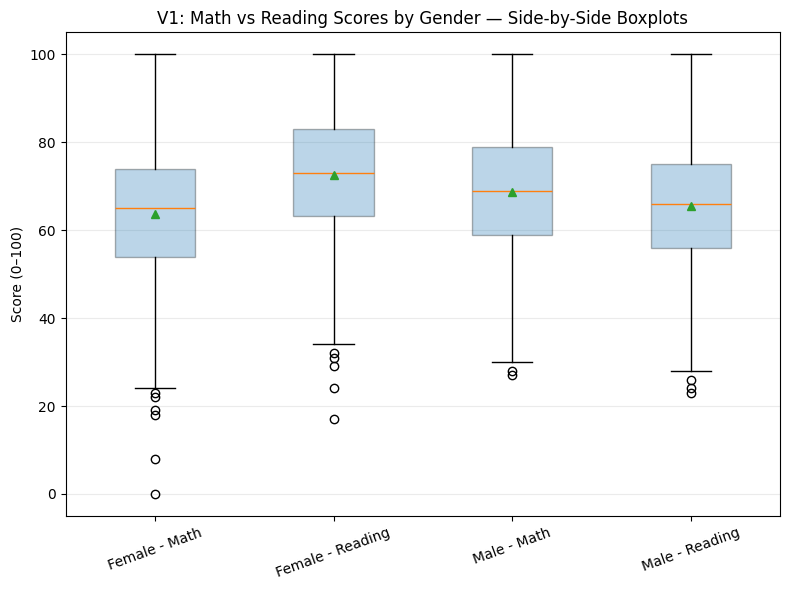

In [57]:
# ---------------- V1: Gender boxplots (math vs reading) ----------------
plt.figure(figsize=(FIG_W, FIG_H))

# Ensure scores are numeric
df[math_col] = pd.to_numeric(df[math_col], errors="coerce")
df[reading_col] = pd.to_numeric(df[reading_col], errors="coerce")

# Drop rows where both math and reading are NaN
df_v1 = df.dropna(subset=[math_col, reading_col], how="all")

genders = df_v1[gender_col].dropna().unique().tolist()
data_v1 = []
labels_v1 = []

for g in genders:
    sub = df_v1[df_v1[gender_col] == g]
    data_v1.append(sub[math_col].values)
    data_v1.append(sub[reading_col].values)
    labels_v1.append(f"{g.title()} - Math")
    labels_v1.append(f"{g.title()} - Reading")

# Plot grouped boxplots
bp = plt.boxplot(data_v1, labels=labels_v1, showmeans=True, patch_artist=True)
for b in bp["boxes"]:
    b.set_alpha(0.3)

plt.ylabel("Score (0–100)")
plt.title("V1: Math vs Reading Scores by Gender — Side-by-Side Boxplots")
plt.xticks(rotation=20)
plt.grid(axis="y", alpha=0.25)

v1_path = os.path.join('/content/question_2/Result', "V1_gender_boxplots_fixed.png")
plt.tight_layout()
plt.savefig(v1_path, dpi=DPI_SAVE)
plt.show()


In [59]:
plt.figure(figsize=(FIG_W, FIG_H))
test_levels = [str(t) for t in df[test_col].fillna("Unknown").astype(str).unique().tolist()]
data_v2 = [df.loc[df[test_col].astype(str) == t, math_col].values for t in test_levels]
bp2 = plt.boxplot(data_v2, labels=[t.title() for t in test_levels], showmeans=True, patch_artist=True)
for b in bp2["boxes"]:
    b.set_alpha(0.3)

plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score (0–100)")
plt.title("V2: Math Scores by Test Preparation Course (Completed vs None)")
plt.grid(axis="y", alpha=0.25)

v2_path = os.path.join('', "V2_test_prep_math.png")
plt.tight_layout(); plt.savefig(v2_path, dpi=DPI_SAVE); plt.close()

/tmp/ipython-input-1181882095.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = plt.boxplot(data_v2, labels=[t.title() for t in test_levels], showmeans=True, patch_artist=True)


In [60]:
plt.figure(figsize=(FIG_W, FIG_H))
means = df["overall_avg"] = df[[math_col, reading_col, writing_col]].mean(axis=1)
bars = plt.bar([str(k).title() for k in means.index.tolist()], means.values)
plt.xlabel("Lunch Type")
plt.ylabel("Mean Overall Average (0–100)")
plt.title("V3: Mean Overall Performance by Lunch Type")
plt.grid(axis="y", alpha=0.25)

for rect in bars:
    h = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, h + 0.6, f"{h:.1f}", ha="center", va="bottom", fontsize=9)

v3_path = os.path.join('/content/question_2/Result', "V3_lunch_overall_avg.png")
plt.tight_layout(); plt.savefig(v3_path, dpi=DPI_SAVE); plt.close()

In [61]:
plt.figure(figsize=(FIG_W, FIG_H))
corr = df[[math_col, reading_col, writing_col]].corr()
im = plt.imshow(corr.values, aspect="equal")
xt = [c.replace("_", " ").title() for c in [math_col, reading_col, writing_col]]
plt.xticks(range(3), xt)
plt.yticks(range(3), xt)
plt.title("V4: Correlation Heatmap — Math, Reading, Writing")

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center")

plt.colorbar(im, fraction=0.046, pad=0.04)

v4_path = os.path.join('/content/question_2/Result', "V4_correlation_heatmap.png")
plt.tight_layout(); plt.savefig(v4_path, dpi=DPI_SAVE); plt.close()

In [62]:
plt.figure(figsize=(FIG_W, FIG_H))
groups = df[test_col].fillna("Unknown").astype(str)
unique_groups = [str(u) for u in groups.unique().tolist()]

for name in unique_groups:
    mask = (groups == name)
    x = df.loc[mask, reading_col].values
    y = df.loc[mask, math_col].values
    plt.scatter(x, y, alpha=0.7, s=18, label=f"{name.title()} (n={mask.sum()})")
    if x.size >= 2:
        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        ys = m * xs + b
        plt.plot(xs, ys)

plt.xlabel("Reading Score (0–100)")
plt.ylabel("Math Score (0–100)")
plt.title("V5: Math vs Reading with Best-Fit Lines by Test Preparation Course")
plt.grid(alpha=0.25)
plt.legend(title="Test Preparation Course", fontsize=8)

v5_path = os.path.join('/content/question_2/Result', "V5_math_vs_reading_trendlines.png")
plt.tight_layout(); plt.savefig(v5_path, dpi=DPI_SAVE); plt.close()

print("Saved figures:")
print(v1_path)
print(v2_path)
print(v3_path)
print(v4_path)
print(v5_path)

Saved figures:
/content/question_2/Result/V1_gender_boxplots_fixed.png
V2_test_prep_math.png
/content/question_2/Result/V3_lunch_overall_avg.png
/content/question_2/Result/V4_correlation_heatmap.png
/content/question_2/Result/V5_math_vs_reading_trendlines.png
